In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("./archive (2)/birds.csv")

In [3]:
df

,class id,filepaths,labels,data set,scientific name
0,0.0,train/ABBOTTS BABBLER/001.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
1,0.0,train/ABBOTTS BABBLER/007.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
2,0.0,train/ABBOTTS BABBLER/008.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
3,0.0,train/ABBOTTS BABBLER/009.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
4,0.0,train/ABBOTTS BABBLER/002.jpg,ABBOTTS BABBLER,train,MALACOCINCLA ABBOTTI
...,...,...,...,...,...
89880,524.0,valid/BLACK BREASTED PUFFBIRD/3.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89881,524.0,valid/BLACK BREASTED PUFFBIRD/4.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89882,524.0,valid/BLACK BREASTED PUFFBIRD/1.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS
89883,524.0,valid/BLACK BREASTED PUFFBIRD/2.jpg,BLACK BREASTED PUFFBIRD,valid,NOTHARCHUS PECTORALIS


In [4]:
top_3_labels = df['labels'].value_counts().nlargest(3).index.tolist()

print("Top 3 most frequently occurring labels:")
print(top_3_labels)

Top 3 most frequently occurring labels:
['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [5]:
train_path = './archive (2)/train'
test_path = './archive (2)/test'
validate_path = './archive (2)/valid'

In [6]:
import os
def count_images_per_label(folder_path, top_labels):
    labels = []
    image_counts = []

    for label in top_labels:
        label_path = os.path.join(folder_path, label)
        if os.path.isdir(label_path):
            num_images = len(os.listdir(label_path))
            
            labels.append(label)
            image_counts.append(num_images)

    return labels, image_counts

In [7]:
train_labels, train_image_counts = count_images_per_label(train_path, top_3_labels)


In [8]:
print("Top 3 labels in the training set:")
print(train_labels)


Top 3 labels in the training set:
['RUFOUS TREPE', 'HOUSE FINCH', 'D-ARNAUDS BARBET']


In [9]:
print("\nNumber of images for each top label in the training set:")
for label, count in zip(train_labels, train_image_counts):
    print(f"{label}: {count} images")


Number of images for each top label in the training set:
RUFOUS TREPE: 263 images
HOUSE FINCH: 248 images
D-ARNAUDS BARBET: 233 images


In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model



datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_generator = datagen.flow_from_directory(
    train_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=top_3_labels  
)

validation_generator = datagen.flow_from_directory(
    validate_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=top_3_labels  
)


Found 744 images belonging to 3 classes.
Found 15 images belonging to 3 classes.


In [11]:
from tensorflow.keras.applications import VGG16
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False

In [12]:
from tensorflow.keras import layers
x = base_model.output
x = layers.Flatten()(x)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(3, activation='softmax')(x)  

In [13]:
model = Model(inputs=base_model.input, outputs=x)


In [14]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [17]:
from tensorflow.keras.callbacks import LearningRateScheduler

def learning_rate_schedule(epoch):
    if epoch < 5:
        return 0.0001
    else:
        return 0.00001

lr_scheduler = LearningRateScheduler(learning_rate_schedule)

Epoch 1/10
24/24 [==============================] - 40s 2s/step - loss: 0.1280 - accuracy: 0.9543 - val_loss: 0.0035 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 2/10
24/24 [==============================] - 42s 2s/step - loss: 0.1181 - accuracy: 0.9570 - val_loss: 0.0043 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 3/10
24/24 [==============================] - 43s 2s/step - loss: 0.1026 - accuracy: 0.9651 - val_loss: 0.0199 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 4/10
24/24 [==============================] - 40s 2s/step - loss: 0.0923 - accuracy: 0.9691 - val_loss: 0.0347 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 5/10
24/24 [==============================] - 39s 2s/step - loss: 0.0887 - accuracy: 0.9785 - val_loss: 0.0142 - val_accuracy: 1.0000 - lr: 1.0000e-04
Epoch 6/10
24/24 [==============================] - 41s 2s/step - loss: 0.0703 - accuracy: 0.9785 - val_loss: 0.0087 - val_accuracy: 1.0000 - lr: 1.0000e-05
Epoch 7/10
24/24 [==============================] - 40s 2s

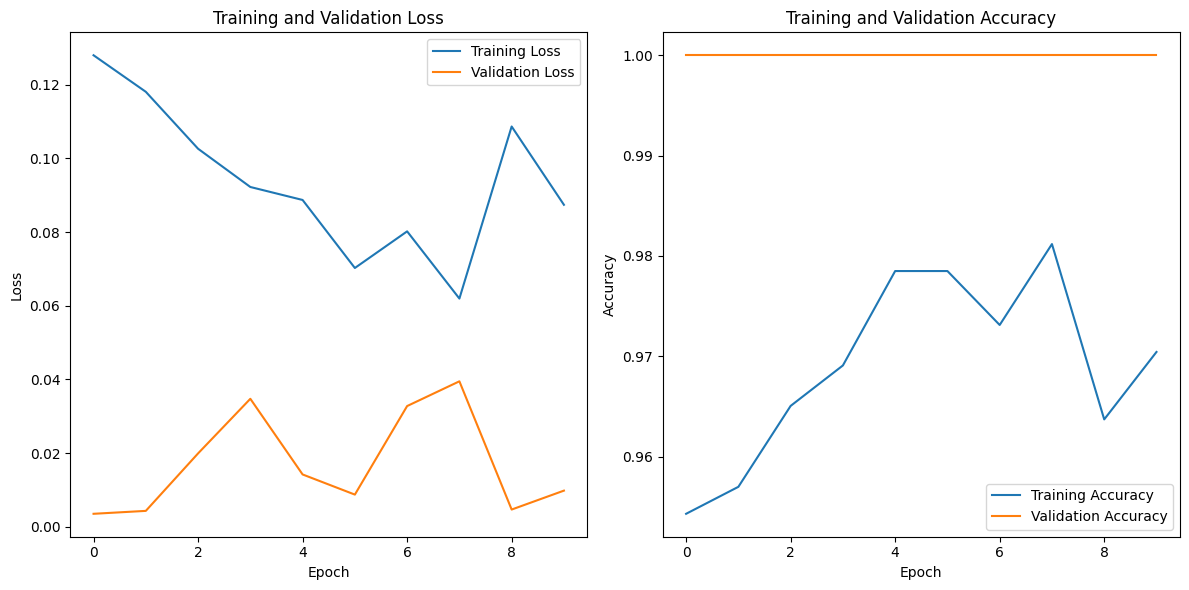

In [18]:
import matplotlib.pyplot as plt

history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator,
    callbacks=[lr_scheduler]
)

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.tight_layout()
plt.show()


# Evaluation on Test Data

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, precision_recall_curve, auc
import numpy as np

test_generator = datagen.flow_from_directory(
    test_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    classes=top_3_labels 
)


Found 15 images belonging to 3 classes.


In [20]:
test_results = model.evaluate(test_generator)


1/1 [==============================] - 1s 750ms/step - loss: 0.0013 - accuracy: 1.0000


In [21]:
y_pred_prob = model.predict(test_generator)
y_pred = np.argmax(y_pred_prob, axis=1)
y_true = test_generator.classes

1/1 [==============================] - 1s 934ms/step


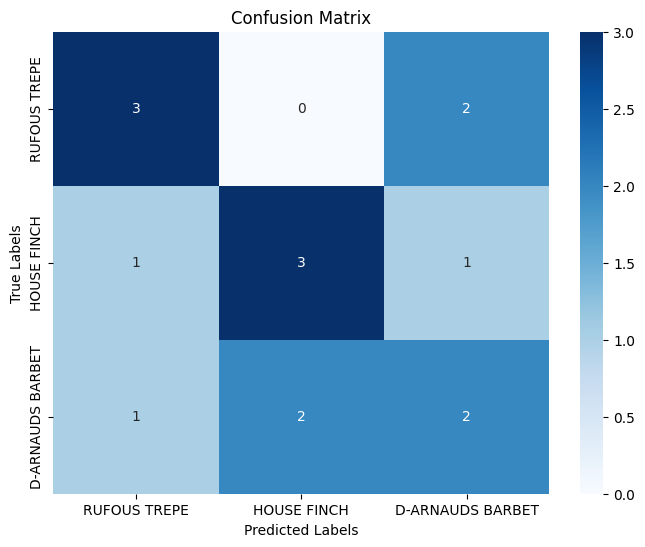

In [32]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=top_3_labels, yticklabels=top_3_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()



In [23]:
class_report = classification_report(y_true, y_pred, target_names=top_3_labels)
print("Classification Report:")
print(class_report)

Classification Report:
                  precision    recall  f1-score   support

    RUFOUS TREPE       0.60      0.60      0.60         5
     HOUSE FINCH       0.60      0.60      0.60         5
D-ARNAUDS BARBET       0.40      0.40      0.40         5

        accuracy                           0.53        15
       macro avg       0.53      0.53      0.53        15
    weighted avg       0.53      0.53      0.53        15



- RUFOUS TREPE: The precision, recall, and F1-score are each at 0.60, indicating a balanced performance with a moderate level of accuracy.

- HOUSE FINCH: Similar to RUFOUS TREPE, the precision, recall, and F1-score are each at 0.60, suggesting a consistent and moderate level of accuracy.

- D-ARNAUDS BARBET: This class exhibits lower precision, recall, and F1-score at 0.40, indicating challenges in the model's ability to accurately classify instances of this class.


The overall accuracy of the model is reported as 53%, and the macro and weighted averages for precision, recall, and F1-score are all around 0.53.

In [26]:
from sklearn.preprocessing import label_binarize
y_true_bin = label_binarize(y_true, classes=[0, 1, 2])
precision = dict()
recall = dict()
pr_auc = dict()
for i in range(len(top_3_labels)):
    precision[i], recall[i], _ = precision_recall_curve(y_true_bin[:, i], y_pred_prob[:, i])
    pr_auc[i] = auc(recall[i], precision[i])

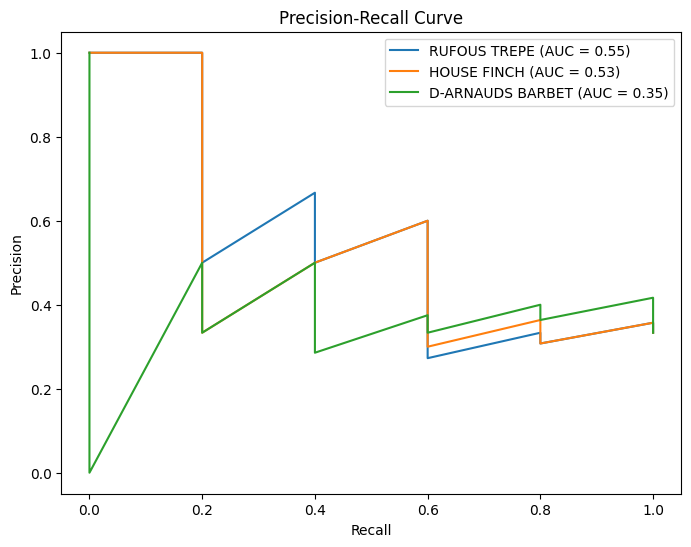

In [27]:
plt.figure(figsize=(8, 6))
for i in range(len(top_3_labels)):
    plt.plot(recall[i], precision[i], label=f'{top_3_labels[i]} (AUC = {pr_auc[i]:.2f})')

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.show()

- Rufous Trepe (AUC=0.55): The AUC is marginally superior to random chance, but it implies that the model's precision and recall for this class are not particularly robust.

- House Finch (AUC=0.53): Much like the preceding case, the AUC is marginally better than random chance, indicating a moderate level of performance.

- D-Arnauds barbet (AUC=0.35): This AUC value is lower, indicating that the model encounters greater challenges in distinguishing this class, resulting in limited precision-recall performance.







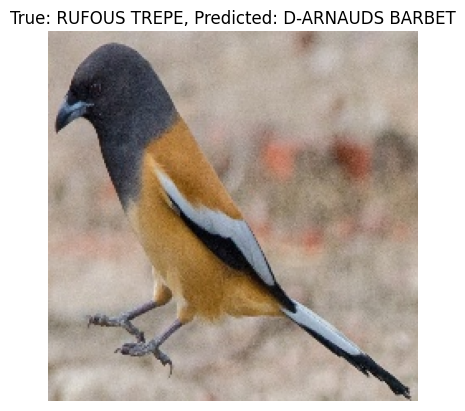

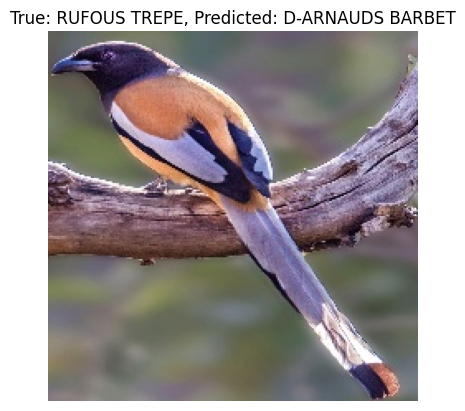

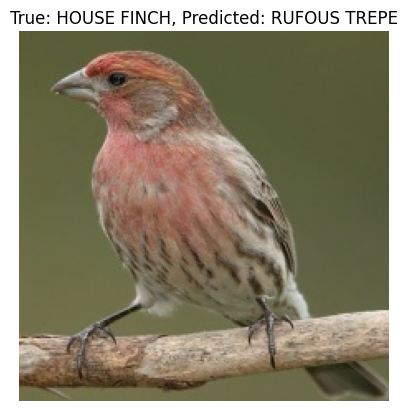

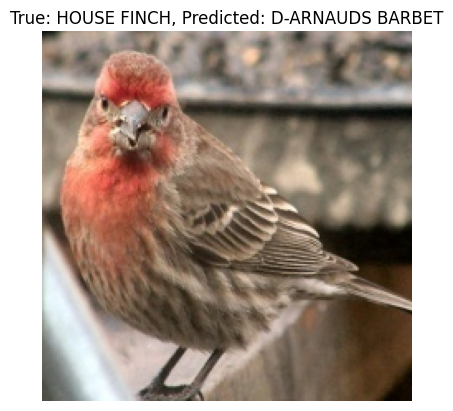

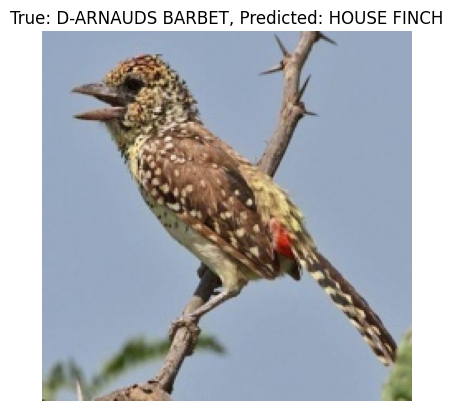

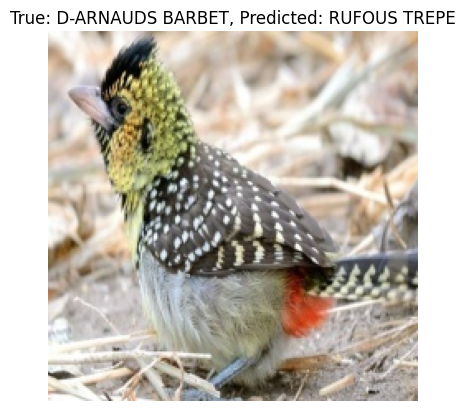

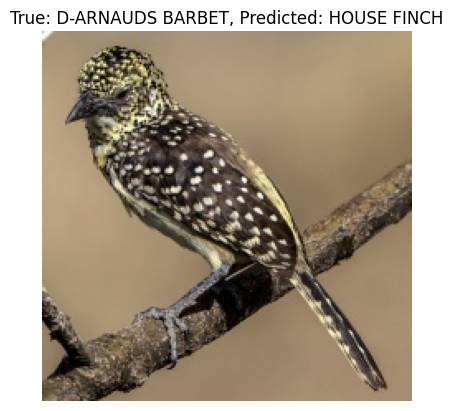

In [36]:
incorrect_indices = np.where(y_true != y_pred)[0]

for index in incorrect_indices: 
    img_path = test_generator.filepaths[index]
    true_label = top_3_labels[y_true[index]]
    predicted_label = top_3_labels[y_pred[index]]
    img = plt.imread(img_path)

    plt.imshow(img)
    plt.title(f"True: {true_label}, Predicted: {predicted_label}")
    plt.axis('off')
    plt.show()
